In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [2]:
titanic = pd.read_csv('train.csv')
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
titanic.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [6]:
print('Survived : ', titanic.Survived.unique())
print('PClasses : ', titanic.Pclass.unique())
print('Gender   : ', titanic.Sex.unique())
print('Embarked : ', titanic.Embarked.dropna().unique())

Survived :  [0 1]
PClasses :  [3 1 2]
Gender   :  ['male' 'female']
Embarked :  ['S' 'C' 'Q']


In [7]:
titanic.duplicated().sum()

0

In [8]:
titanic.drop_duplicates(inplace = True)           # to remove duplicates

In [9]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
titanic.drop('Cabin', axis = 1, inplace = True)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:xlabel='Age', ylabel='Density'>

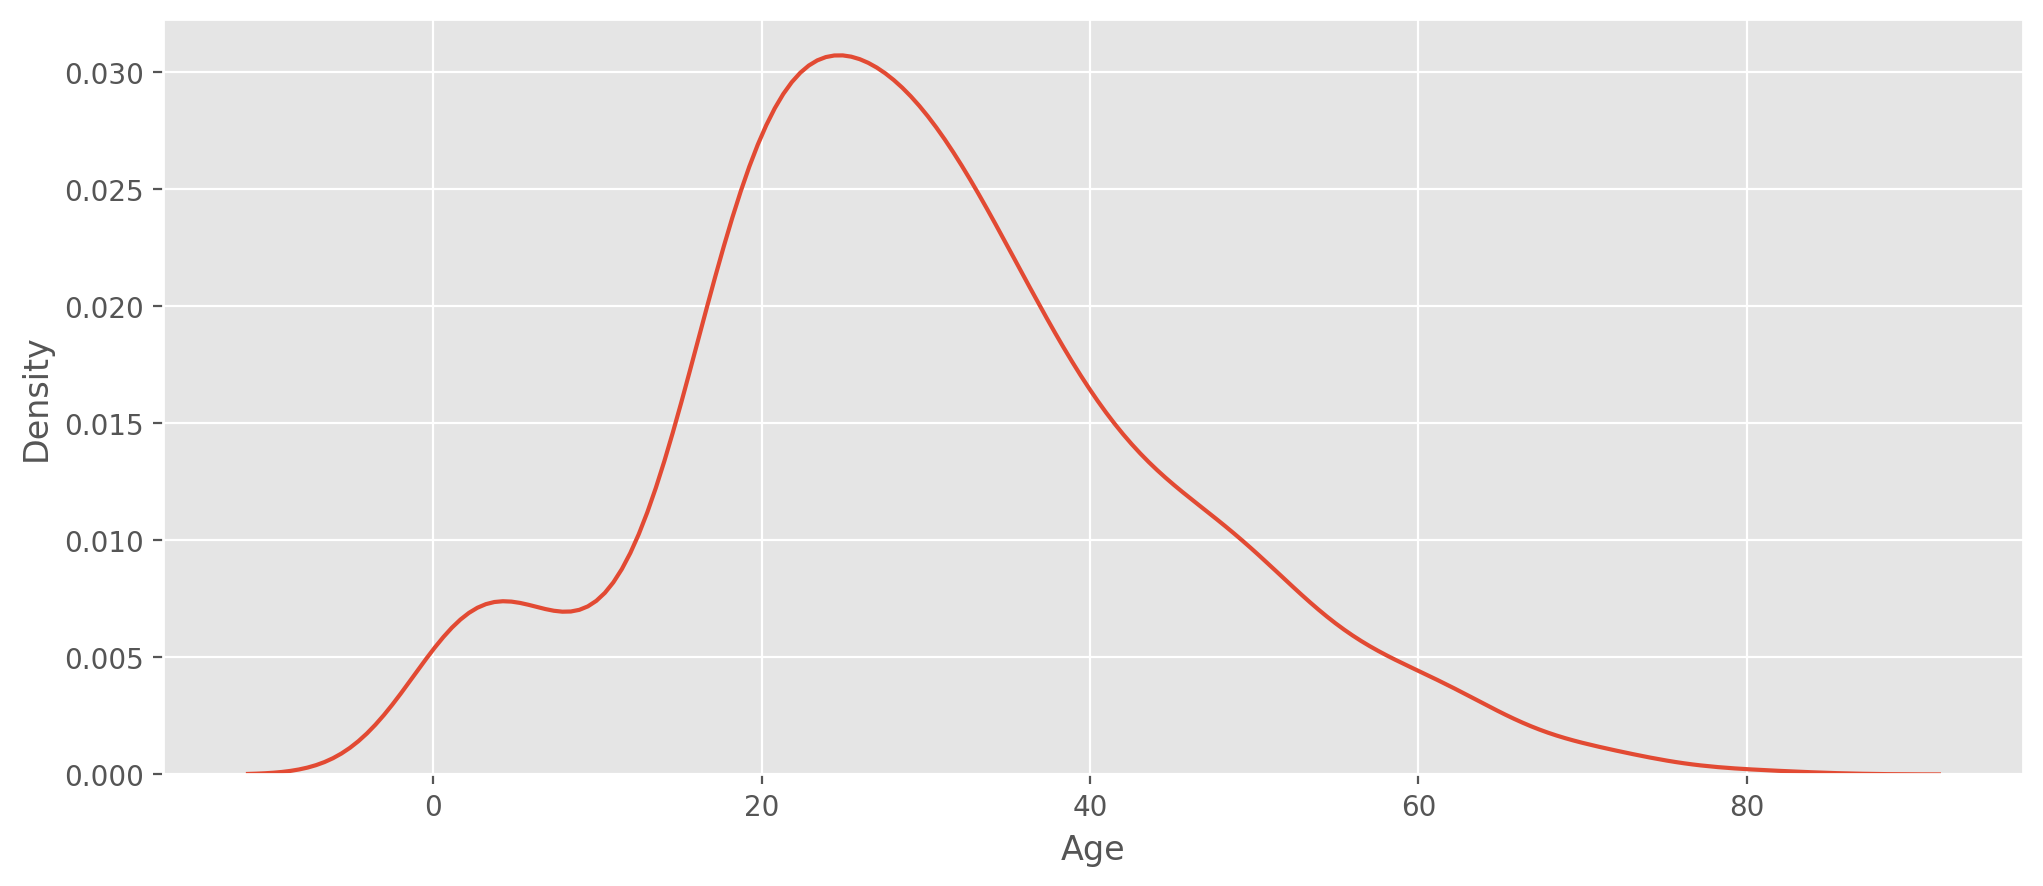

In [11]:
plt.figure(figsize = (12,5), dpi = 200)
sns.distplot(titanic.Age, hist = False)

In [12]:
mean_age = titanic.Age.mean()
titanic.Age.replace(np.nan, mean_age, inplace = True)

titanic.Age.isnull().sum()

0

In [13]:
mode_emb = titanic.Embarked.dropna().mode()[0]
titanic.Embarked.replace(np.nan, mode_emb, inplace = True)

titanic.Embarked.isnull().sum()

0

In [14]:
# Creating a new column family_members by adding SibSp and Parch
titanic['family_members'] = titanic.SibSp + titanic.Parch
titanic.drop(['SibSp', 'Parch'], inplace = True, axis = 1)

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_members
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0


# ============================================================

# Exploratory Data Analysis

<AxesSubplot:xlabel='Survived', ylabel='count'>

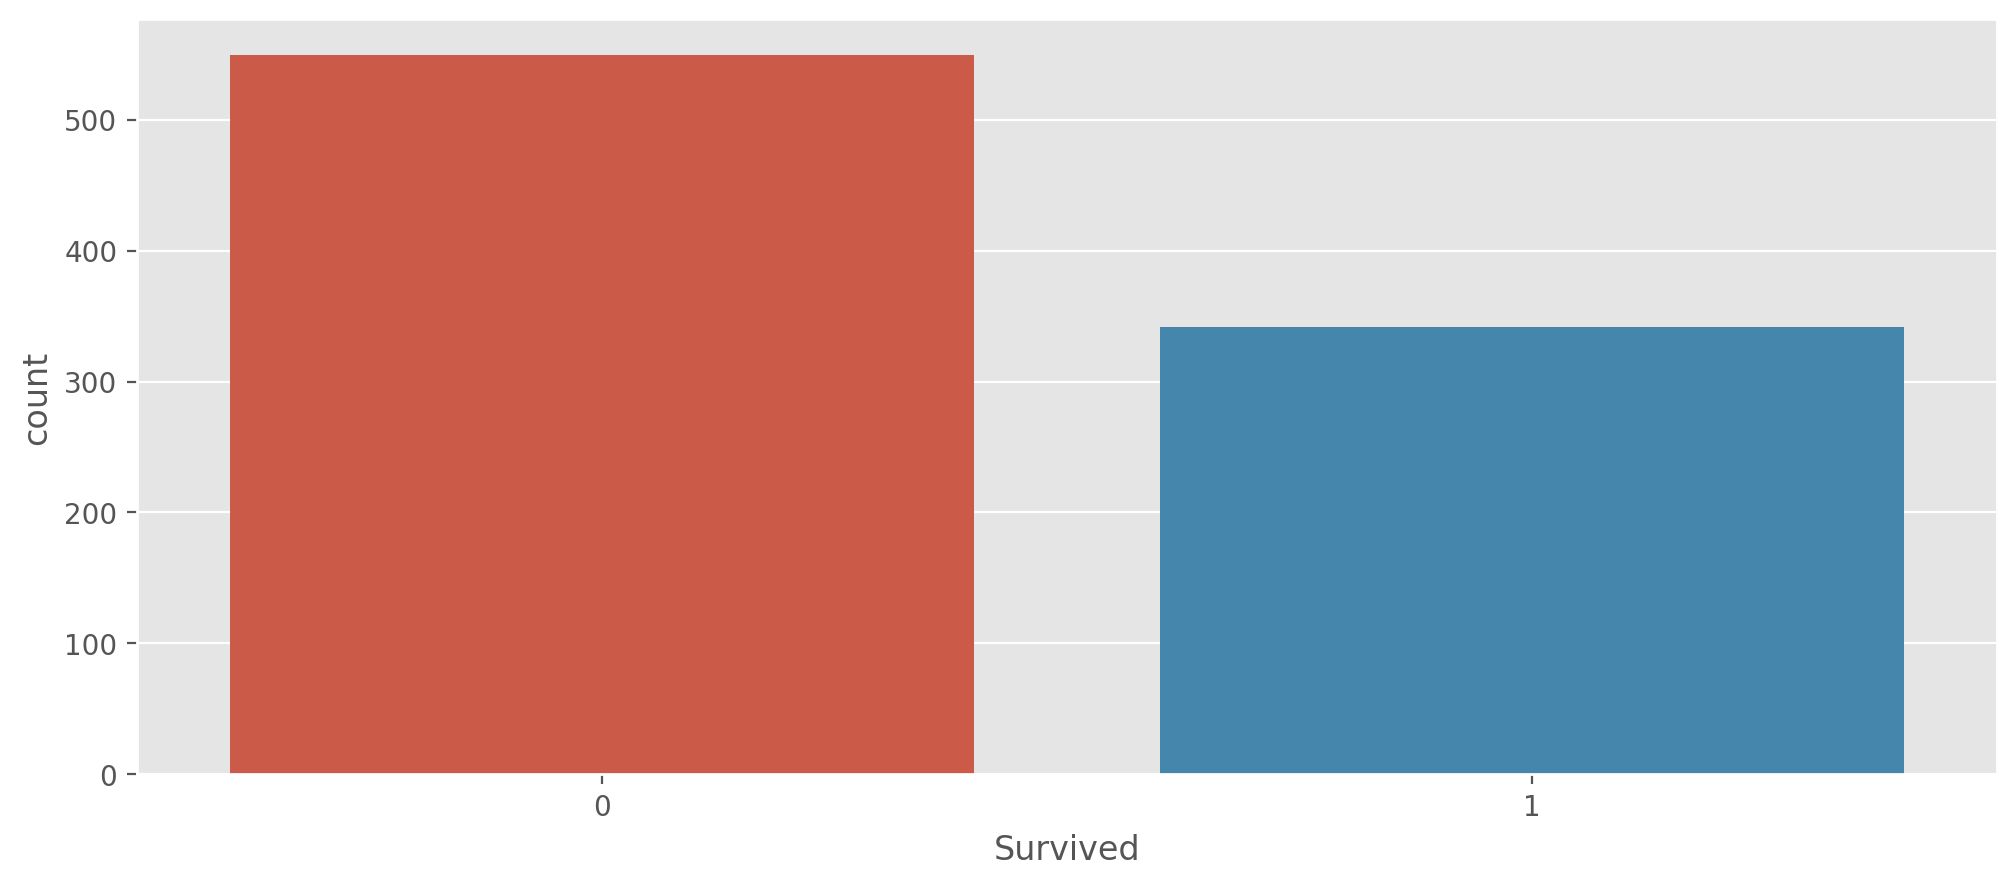

In [15]:
# To check how many survived and how many were dead
plt.figure(figsize = (12,5), dpi = 200)
sns.countplot('Survived', data = titanic)

In [16]:
titanic.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [17]:
survival_ratio = titanic.Survived.value_counts(normalize = True)
print('Percentage of Survivors : ', round(survival_ratio[1] * 100,2),'%')
print('Percentage of dead      : ', round(survival_ratio[0] * 100,2),'%')

Percentage of Survivors :  38.38 %
Percentage of dead      :  61.62 %


<AxesSubplot:xlabel='Sex', ylabel='count'>

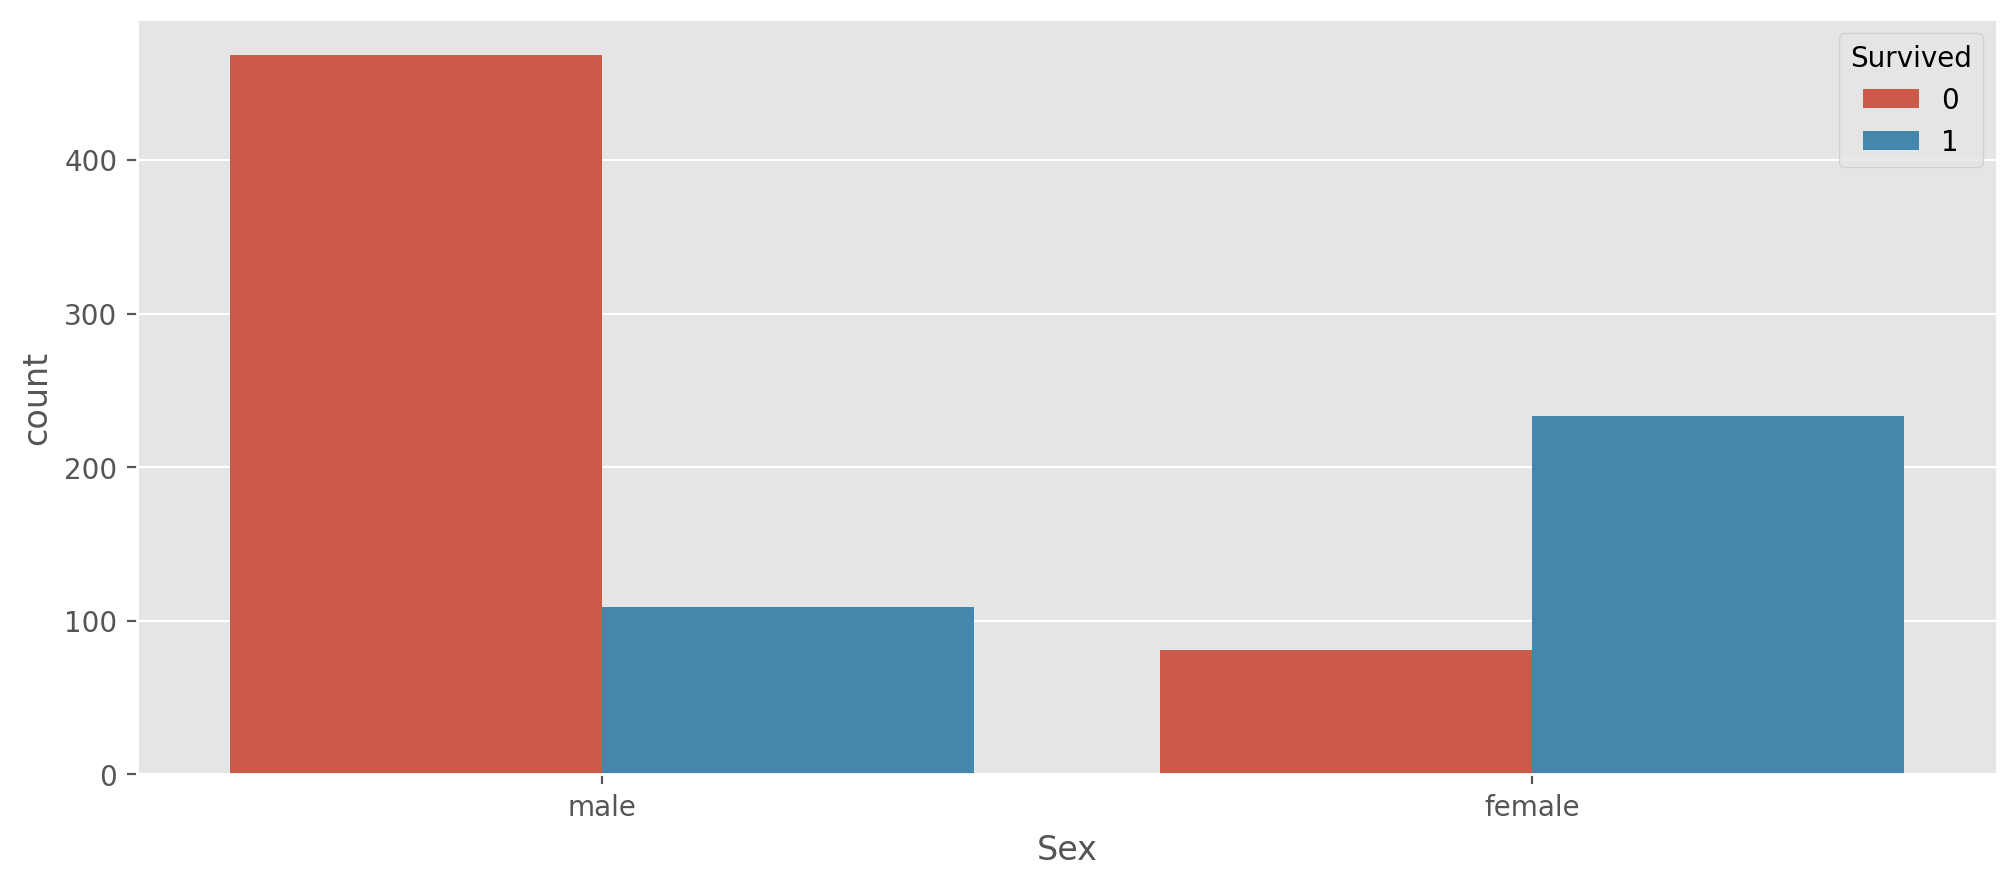

In [18]:
# Analysing Survival with Gender
plt.figure(figsize = (12,5), dpi = 200)
sns.countplot('Sex', hue = 'Survived', data = titanic)

In [19]:
svl_rate = titanic.groupby('Sex')['Survived'].value_counts(normalize = True)
svl_rate

Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: Survived, dtype: float64

In [20]:
print('Percentage of female survivors  : ', round(svl_rate['female'][1]*100,2), '%')
print('Percentage of dead females      : ', round(svl_rate['female'][0]*100, 2), '%')
print('Percentage of male survivors    : ', round(svl_rate['male'][1]*100, 2), '%')
print('Percentage of dead males        : ', round(svl_rate['male'][0]*100, 2), '%')

Percentage of female survivors  :  74.2 %
Percentage of dead females      :  25.8 %
Percentage of male survivors    :  18.89 %
Percentage of dead males        :  81.11 %


<AxesSubplot:xlabel='Pclass', ylabel='count'>

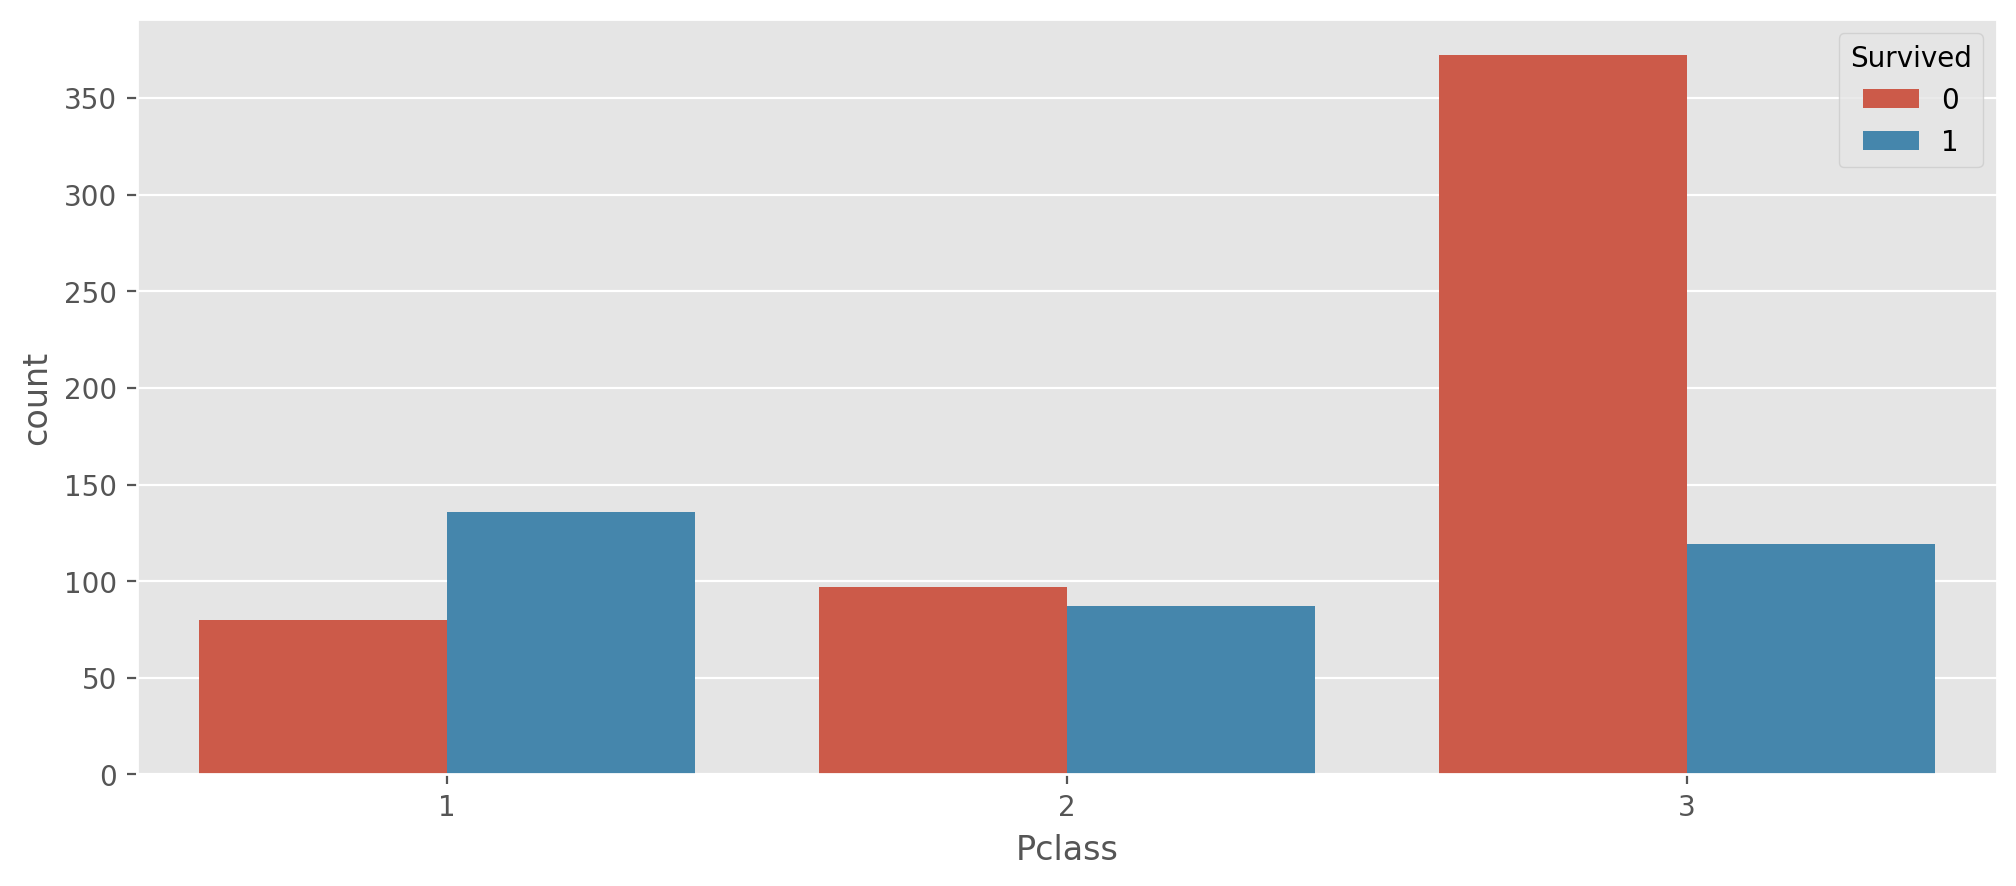

In [21]:
# Survival with respect to passenger class
plt.figure(figsize = (12,5), dpi = 200)
sns.countplot('Pclass', hue = 'Survived', data = titanic)

In [22]:
svl_rate = titanic.groupby('Pclass')['Survived'].value_counts(normalize = True)
svl_rate

Pclass  Survived
1       1           0.629630
        0           0.370370
2       0           0.527174
        1           0.472826
3       0           0.757637
        1           0.242363
Name: Survived, dtype: float64

In [23]:
print('Percentage of 1st Passenger class Survivors : ', round(svl_rate[1][1]*100,2), '%')
print('Percentage of 1st Passenger class Dead      : ', round(svl_rate[1][0]*100,2), '%')
print('Percentage of 2nd Passenger class Survivors : ', round(svl_rate[2][1]*100,2), '%')
print('Percentage of 2nd Passenger class Dead      : ', round(svl_rate[2][0]*100,2), '%')
print('Percentage of 3rd Passenger class Survivors : ', round(svl_rate[3][1]*100,2), '%')
print('Percentage of 3rd Passenger class Dead      : ', round(svl_rate[3][0]*100,2), '%')

Percentage of 1st Passenger class Survivors :  62.96 %
Percentage of 1st Passenger class Dead      :  37.04 %
Percentage of 2nd Passenger class Survivors :  47.28 %
Percentage of 2nd Passenger class Dead      :  52.72 %
Percentage of 3rd Passenger class Survivors :  24.24 %
Percentage of 3rd Passenger class Dead      :  75.76 %


<AxesSubplot:xlabel='Embarked', ylabel='count'>

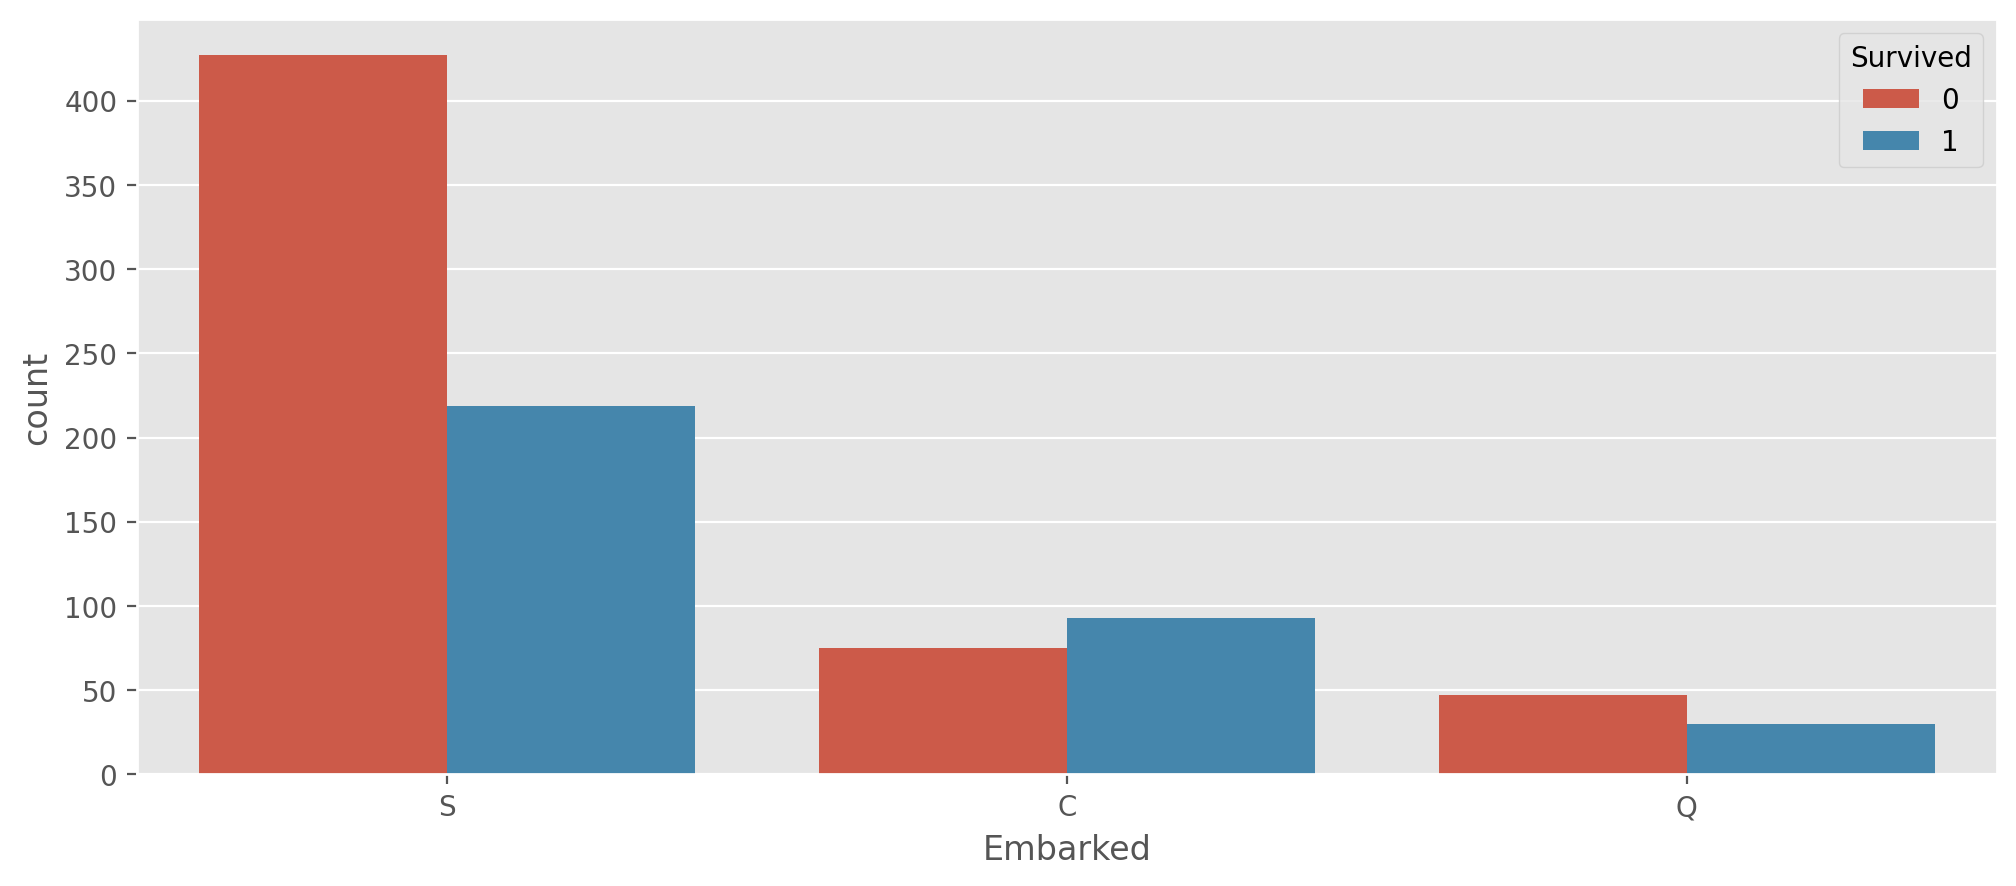

In [24]:
# Survival with respect to Embarked
plt.figure(figsize = (12,5), dpi = 200)
sns.countplot('Embarked', hue = 'Survived', data = titanic)

In [25]:
svl_rate = titanic.groupby('Embarked')['Survived'].value_counts(normalize = True)
svl_rate

Embarked  Survived
C         1           0.553571
          0           0.446429
Q         0           0.610390
          1           0.389610
S         0           0.660991
          1           0.339009
Name: Survived, dtype: float64

In [26]:
titanic[titanic.Fare > 500]

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_members
258,259,1,1,"Ward, Miss. Anna",female,35.0,PC 17755,512.3292,C,0
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,PC 17755,512.3292,C,1
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,PC 17755,512.3292,C,0


<AxesSubplot:xlabel='Survived', ylabel='Fare'>

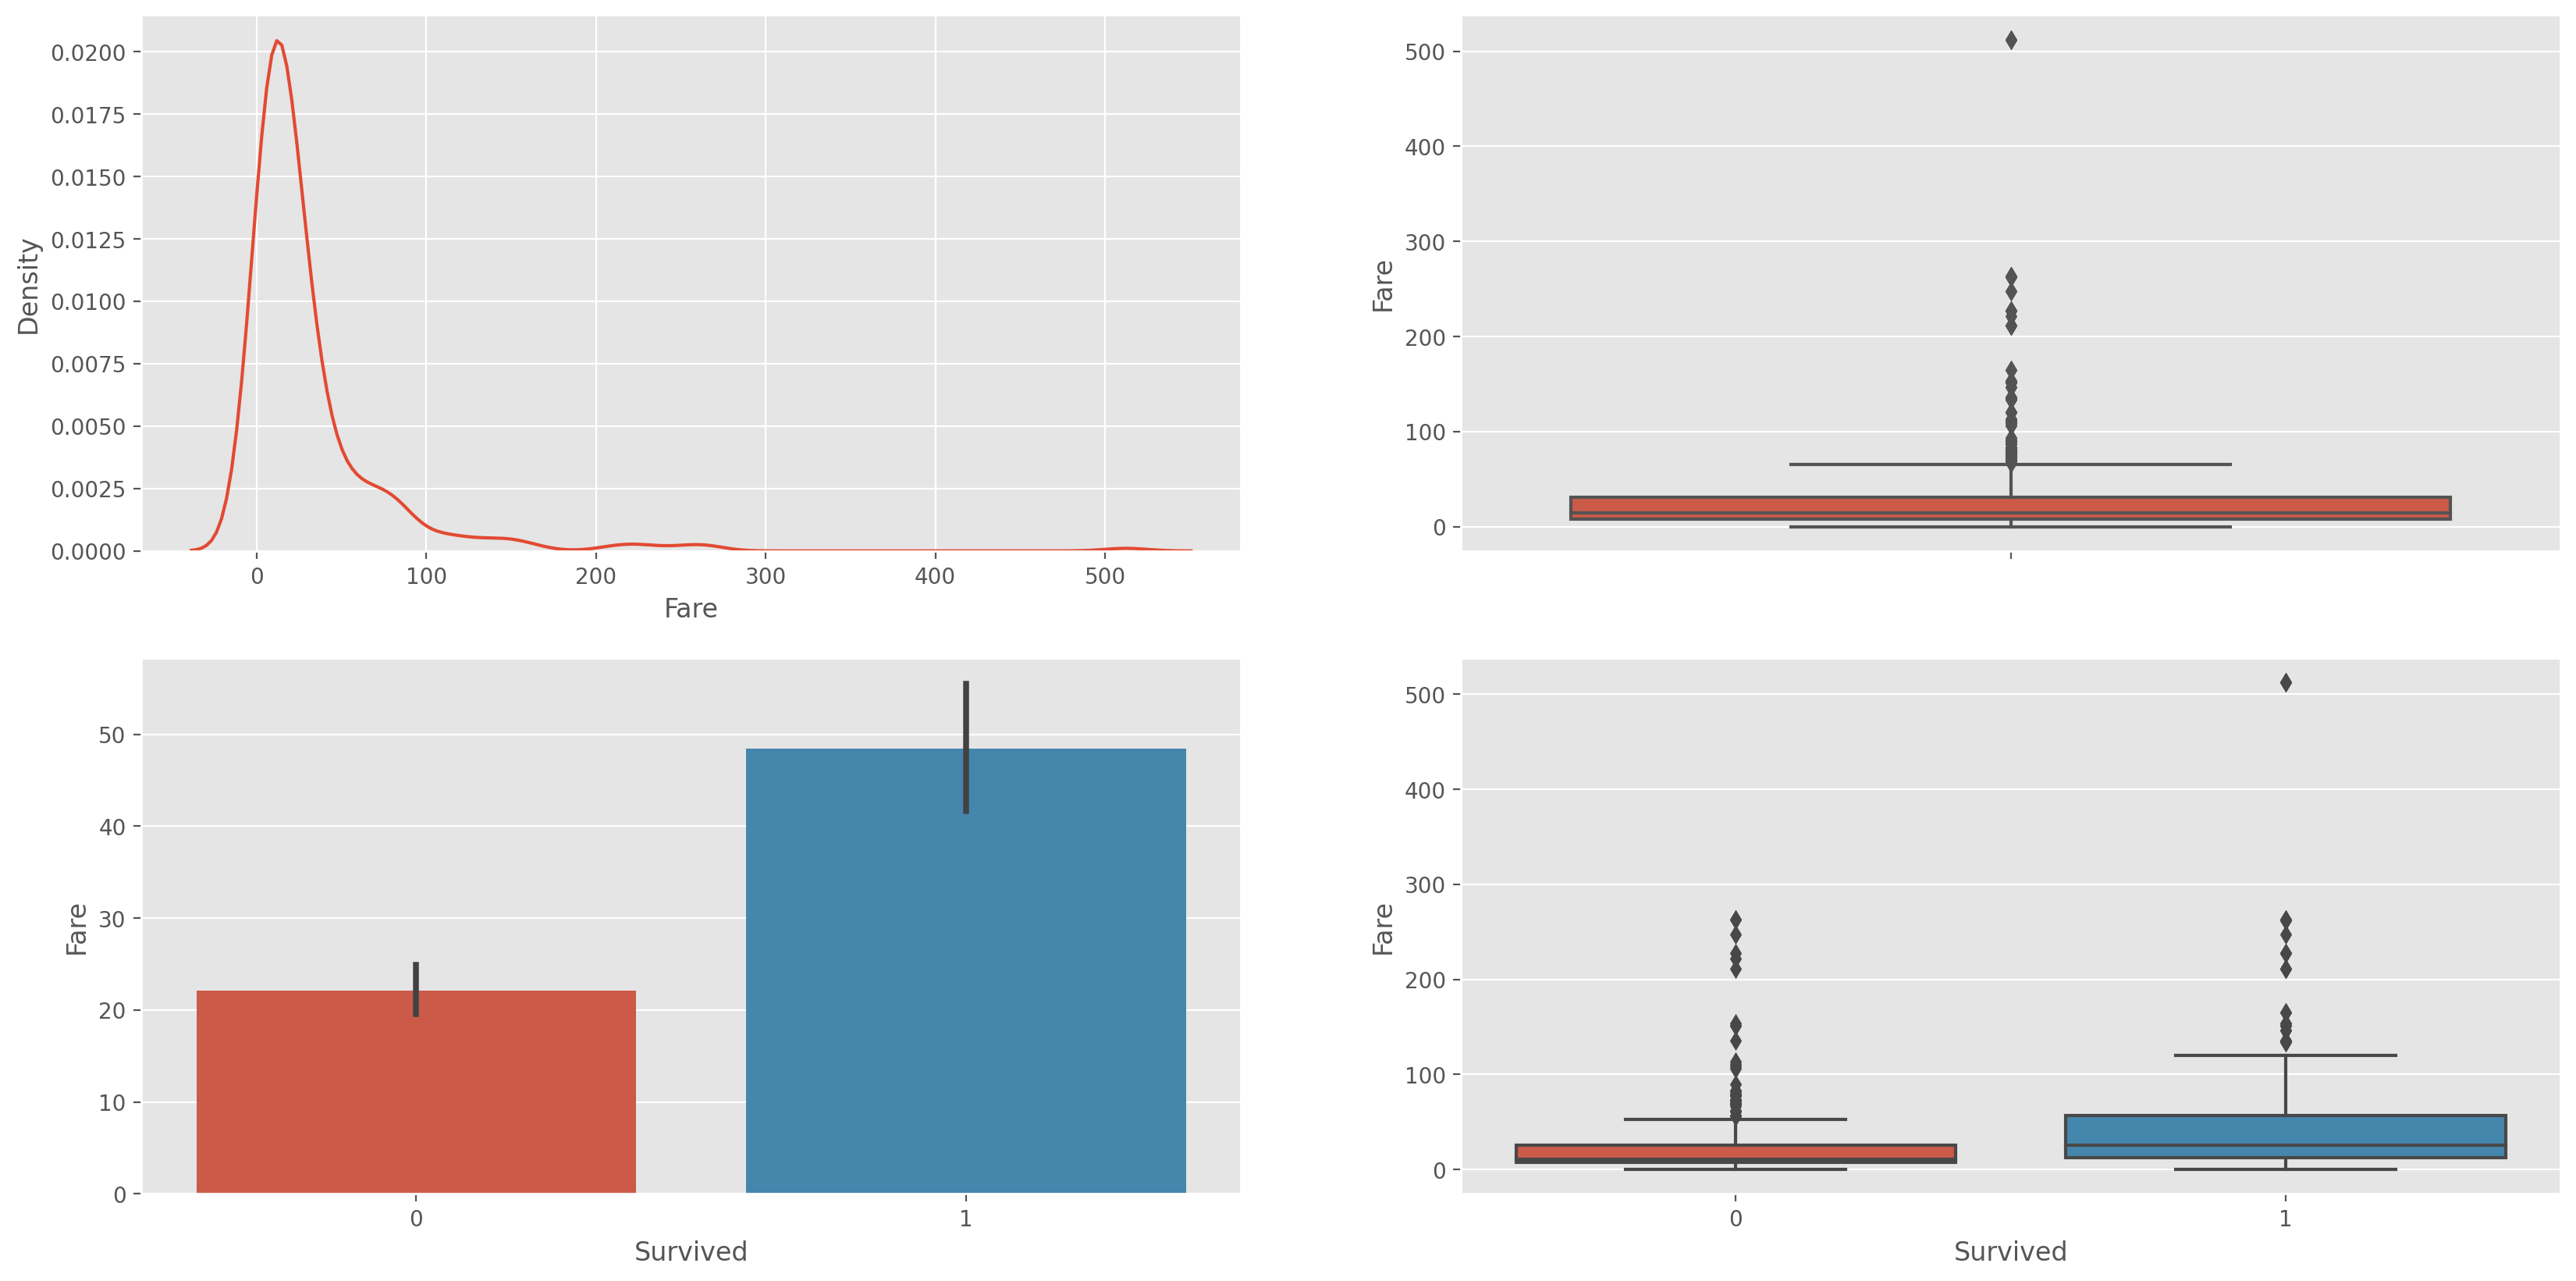

In [27]:
# Analysing fare
plt.figure(figsize = (20,10), dpi = 200)
plt.subplot(2,2,1)
sns.distplot(titanic.Fare, hist = False)
plt.subplot(2,2,2)
sns.boxplot(y = 'Fare', data = titanic)
plt.subplot(2,2,3)
sns.barplot('Survived', 'Fare', data = titanic)
plt.subplot(2,2,4)
sns.boxplot('Survived', 'Fare', data = titanic)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

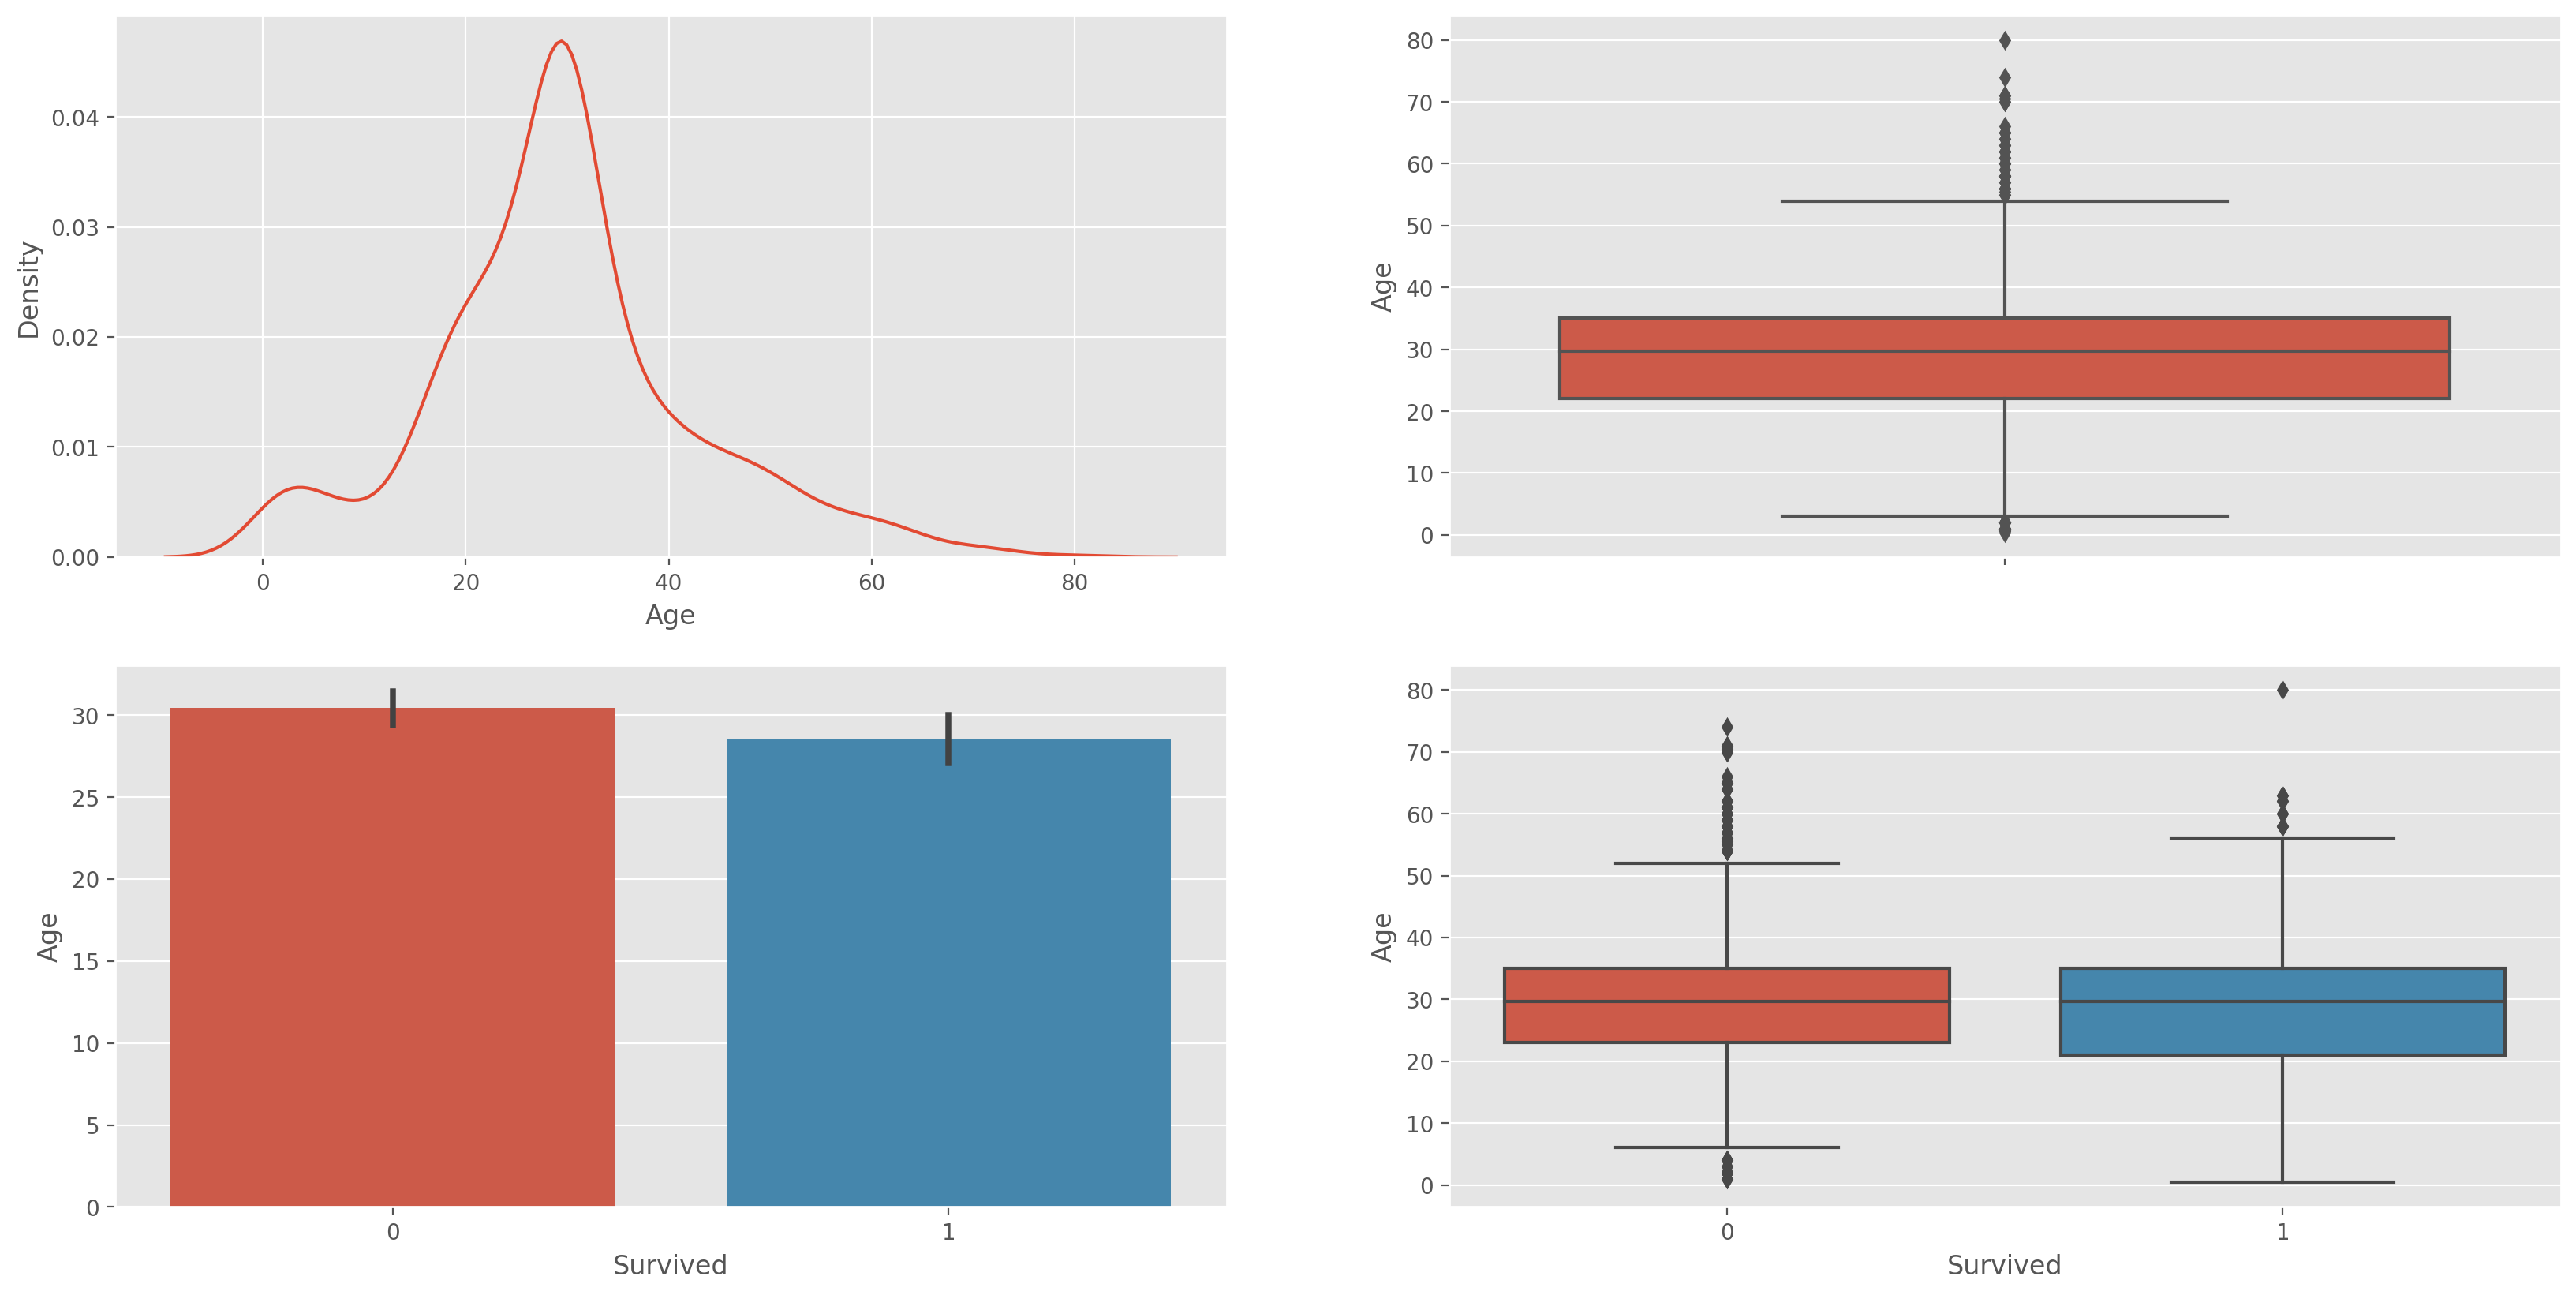

In [28]:
# Analysing fare
plt.figure(figsize = (20,10), dpi = 200)
plt.subplot(2,2,1)
sns.distplot(titanic.Age, hist = False)
plt.subplot(2,2,2)
sns.boxplot(y = titanic.Age)
plt.subplot(2,2,3)
sns.barplot('Survived', 'Age', data = titanic)
plt.subplot(2,2,4)
sns.boxplot('Survived', 'Age', data = titanic)

<AxesSubplot:xlabel='family_members', ylabel='count'>

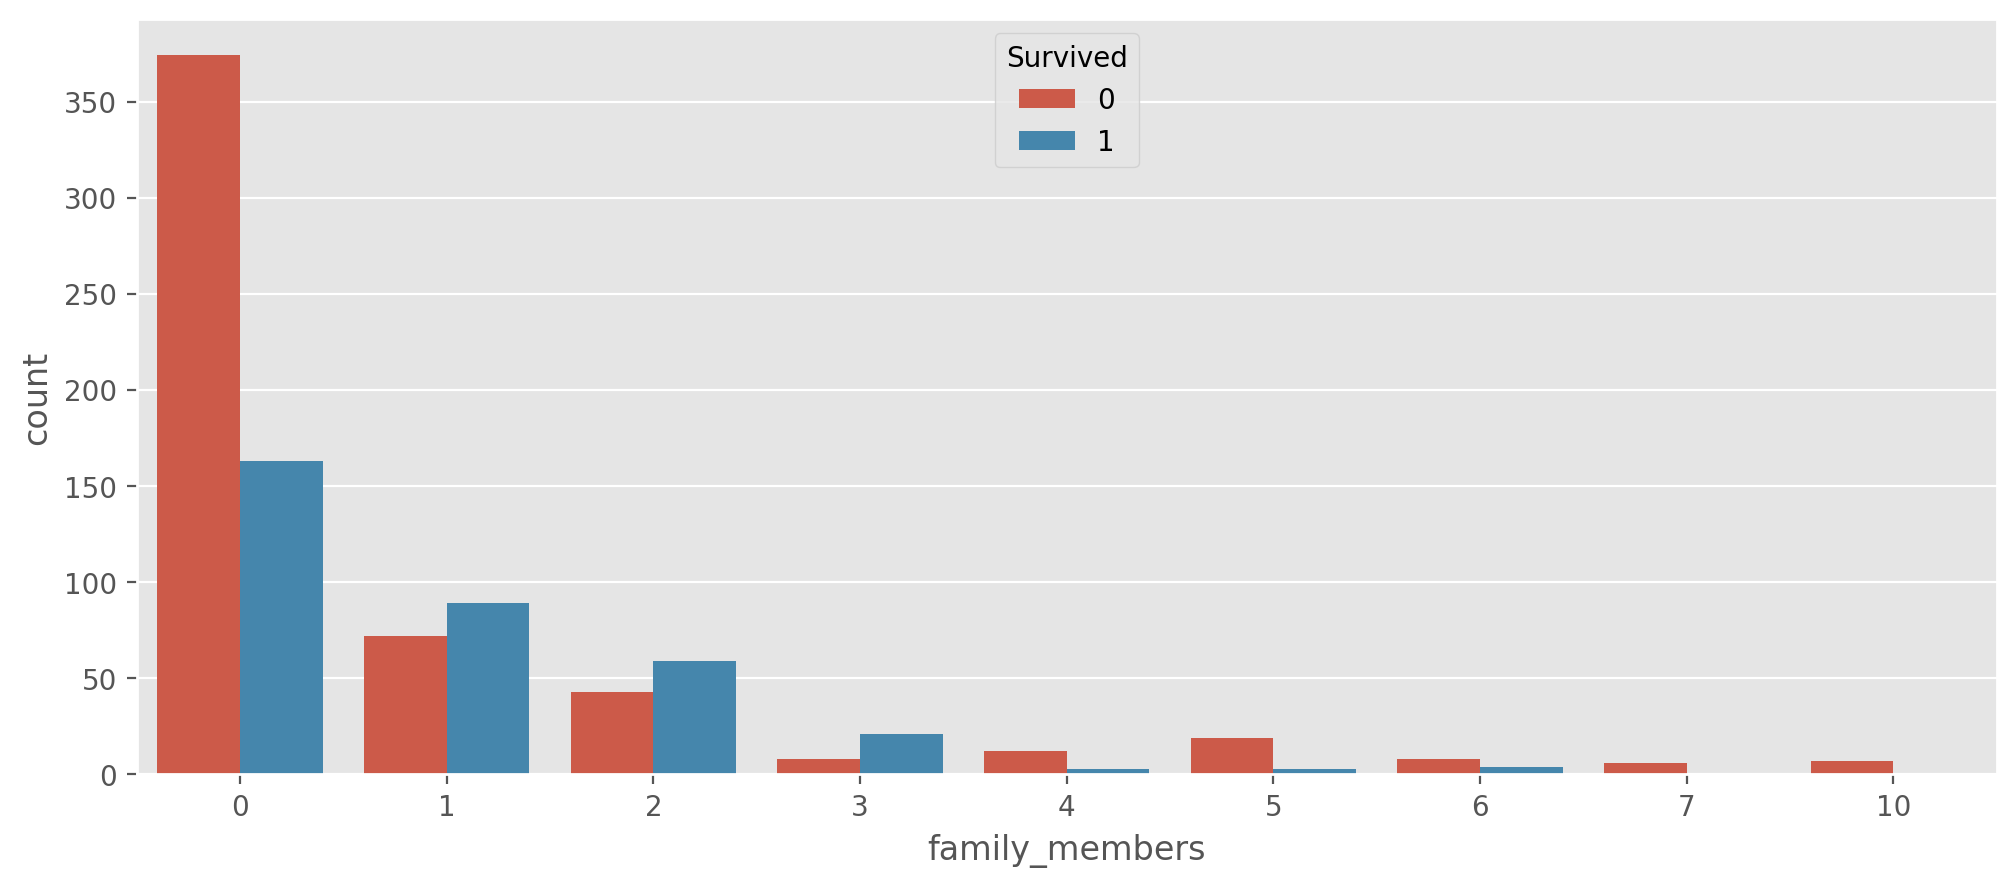

In [29]:
# Survival with respect to Embarked
plt.figure(figsize = (12,5), dpi = 200)
sns.countplot('family_members', hue = 'Survived', data = titanic)

------

In [30]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_members
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0


In [31]:
titanic['Sex'] = titanic['Sex'].map({'female' : 0, 'male' : 1})
titanic['Embarked'] = titanic['Embarked'].map({'C' : 0, 'Q' : 1, 'S' : 2})
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_members
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,A/5 21171,7.2500,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,PC 17599,71.2833,0,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,STON/O2. 3101282,7.9250,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,113803,53.1000,2,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,373450,8.0500,2,0


In [32]:
# Binning (Creating bands)
titanic.loc[titanic.Age <= 20, 'Age'] = 0
titanic.loc[(titanic.Age > 20) & (titanic.Age <= 40), 'Age'] = 1
titanic.loc[titanic.Age > 40, 'Age'] = 2

titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_members
0,1,0,3,"Braund, Mr. Owen Harris",1,1.0,A/5 21171,7.2500,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1.0,PC 17599,71.2833,0,1
2,3,1,3,"Heikkinen, Miss. Laina",0,1.0,STON/O2. 3101282,7.9250,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1.0,113803,53.1000,2,1
4,5,0,3,"Allen, Mr. William Henry",1,1.0,373450,8.0500,2,0
5,6,0,3,"Moran, Mr. James",1,1.0,330877,8.4583,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",1,2.0,17463,51.8625,2,0
7,8,0,3,"Palsson, Master. Gosta Leonard",1,0.0,349909,21.0750,2,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,1.0,347742,11.1333,2,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,0.0,237736,30.0708,0,1


In [33]:
cols = ['Pclass', 'Embarked', 'Sex', 'family_members', 'Age', 'Fare']
X = titanic[cols]
Y = titanic[['Survived']]

In [34]:
X.head()

,Pclass,Embarked,Sex,family_members,Age,Fare
0,3,2,1,1,1.0,7.2500
1,1,0,0,1,1.0,71.2833
2,3,2,0,0,1.0,7.9250
3,1,2,0,1,1.0,53.1000
4,3,2,1,0,1.0,8.0500


In [35]:
Y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [36]:
print('Independent Feature Set Shape : ', X.shape)
print('Dependent Feature Shape  :      ', Y.shape)

Independent Feature Set Shape :  (891, 6)
Dependent Feature Shape  :       (891, 1)


In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.25, random_state = 5)

In [38]:
print('Training Data Shape   : ', x_train.shape)
print('Training Labels Shape : ', y_train.shape)
print('Testing Data Shape    : ', x_test.shape)
print('Testing Labels Shape  : ', y_test.shape)

Training Data Shape   :  (668, 6)
Training Labels Shape :  (668, 1)
Testing Data Shape    :  (223, 6)
Testing Labels Shape  :  (223, 1)


In [39]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression()

In [40]:
pred_train = classifier.predict(x_train)
pred_test  = classifier.predict(x_test)

In [41]:
from sklearn.metrics import accuracy_score
print('Training Set Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing  Set Accuracy : ', accuracy_score(y_test, pred_test))

Training Set Accuracy :  0.7949101796407185
Testing  Set Accuracy :  0.8295964125560538


In [42]:
# Traying with KNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(x_train, y_train)

pred_train = classifier.predict(x_train)
pred_test  = classifier.predict(x_test)

print('Training Set Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing  Set Accuracy : ', accuracy_score(y_test, pred_test))

Training Set Accuracy :  0.8532934131736527
Testing  Set Accuracy :  0.8251121076233184
